# Run-Pass Oracle (RPO)

# Introduction

This submission aims to build a better methodology for predicting, pre-snap, whether a team will pass the ball. To do this, we created the **Run-Pass Oracle** model, built on top of a LightGBM architecture. We managed to achieve performance that surpasses state-of-the-art literature, while still maintaining interpretability. 

Much of this performance is driven by feature engineering, including metrics to track pre-snap factors such as **Motion Intentionality**, **Defensive Congestion**, and **Contextualized Tempo**. These features heavily utilize the provided tracking data, and resultingly show a big boost over extant models, which produced accuracy in the low 70's that came with major qualifications. Perhaps most notably is Ben Baldwin's expected pass model (todo: link), which we incorporate into our model; however, as the graphic below demonstrates, this still results in a decent amount of noise:

<div>
<center><img src="image/pass_rate_thru_w7.png" width="600" height = "400"></center>
</div>

Baldwin's model is good for judging what a team will likely do given important context like down and distance, and also bakes a bit of context in using Vegas odds. However, it doesn't incorporate the rich tracking data utilized in our model, and also misses significantly on teams like the Chiefs and Bills, whose superstart QB's make them far more pass-happy than expected. By incorporating tracking data, as well as other contextual metrics, our model shows nearly a ten-percent boost over earlier literature in both a test and validation set, providing hope for generalizibility while still demonstrating immediate usefulness.

# I. Engineered Metrics & Other features

### a) Feature overview

Our model encompasses six features, many of which aggregate less-important features into more informative metrics:

- **Situational Expected Pass Rate** draws [Ben Baldwin's pass rate model](https://opensourcefootball.com/posts/2020-09-28-nflfastr-ep-wp-and-cp-models/). While it is the dominant feature in our model, encompassing many other important features, it still is only at about 70% accuracy on its own, and fails to explicitly encompass tracking data & other player info.

- **Motion Favorability**: The delta between number of players in motion post-lineset and the number of players who shifted. (TODO: Do we exclude RB2? Is that worth a small performance dent to snazz up the model?) While this seems fairly simple, it is by far the most informative approach we have found to incorporating motion into our model. (todo: display failed approaches?) This is because it is more important to know how many players are in motion (todo: break out a chart with multiple in motion vs. single vs. none?) vs. other stats like acceleration or distance covered. Similarly, since motion generally implies passing, and simple shifts imply runs, if both occur on the same play, then getting the delta between them concisely informs our prediction.

- **neg_Formations** Captures which formations negatively impact pass rate. (TODO: cite which)


- **TICK**, or more verbosely, **Tempo Including Contextual Knowledge**. This metric combines our **Tempo** metric with other contextual info, such as player weight at key positions, to understand how team personnel and play-calling tendencies combine to predict pass rates (TODO: Figure what exactly I put inside this)

-  **Defensive Congestion**, i.e., the mean pairwise distance between players on defense, with more recent frames weighted more heavily. The clear benefit of this is that we can pick up nuanced info that coarser features, such as offensive formations (e.g., 2x2) and men-in-box counts, may miss.



### b) Examining Formational Impact

Our model heavily relies on the concept of "negative formations", i.e., formations that heavily favor runs. This feature is an important example of how necessary it is to encode concepts that, however obvious they may seem to humans, are still necessary to teach our models about. One of these formations is **I-Formation**, a heavier personnel grouping used almost exclusively for runs or play-action that is perhaps *the* stereotypical run formation. Similarly self-explanatory is **Pistol**, used to great effect by teams like the Ravens to take advantage of QB Lamar Jackson's running prowess. Less explicable is the **Single-back** formation's inclusion (TODO: Explain it)

In [5]:
import plotly
plotly.io.read_json('image/cincy_drive.json')

The above graph shows just how impactful these 'negative' formations are in depressing our expected pass rate. This is an example from a **Cincinnati Bengals** drive (todo: cite which week?), one of the most pass-happy teams over the course of the 2022 season at an average 62% pass rate. Our model thinks that, given all the other information we provide it, most of the Bengals are more likely to pass than not on almost all the plays of the drive.

This of course tracks with the common understanding that Bengals QB Joe Burrow strongly prefers to pass from Shotgun, perhaps implying a departure from this could significantly depress the expected pass rate. Yet the extent to which knowing a formation is negatively related to passing depresses our expected pass rate is remarkable, and clearly informative.

#### TODO: maybe find a way to line up what actually happened here? find a way to cleanly present as a series of dots or something what actually happened vis a vis run pass?

### TODO: find something to showcase here; maybe see if we can find a real clip of multiple players in motion (while only one shifts) from '22

# 1. Model

Our model is comprised of the following features, including the aformentioned ones:



Their Shapley importances are below:

## a) Model design

Our model itself was a LightGBM model, with a maximum depth of 5 as to prevent overfitting. For the 9 weeks of tracking data provided, we trained from weeks 3-7, using week 8 as a validation set, then week 8 as test proper. This was for a couple of reasons:
- Validation benefits blah blah
- Test benefits blah blah

Note how val accuracy helped us show if incremental gain in test is really worth it, maybe mention how final results actually better than what we present idk

### TODO: show a tree here? later?

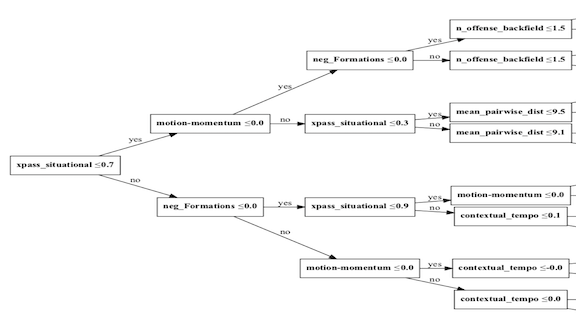



## b) Model performance

Our model beats most play-level benchmarks (TODO: cite literature) in the public literature for play-level pass prediction. The model we present is, in our opinion, the best blend of interpretability and generalization we've achieved. 

TODO: incorporate validation performance maybe? Does that undermine, or bolster, our case? Try and juice Test performance?

Our model shows a slight bias toward predicting passes; however, this is to be expected, since the general tendency is for teams to pass more frequently. Notably, its misses are essentially equal between events that were runs and passes, suggesting a decent generalizibility.

<img src="image/performance_example.png" width="750" align="center">

b) # Real-time feature impact

Because we use exponential means w/moving windows blah blah blah, we can actually show the impact of a stat changing the impact of our model in real-time. Below is the effect of defensive congestion on real-time pass odds:

<img src="image/comb.gif" width="750" align="center">